# <center> The New Space Race

At the turn of the century, a new space race was afoot! With the increase dependence on satellites for telecommunication and media, more and more private companies have started investing into space technology. However, the interest of space entrepreneurs have now far exceeded the practical applications of space technology. Billionaires such as Elon Musk, Jeff Bezos, and Richard Branson have all entered the race to become the leader in not just space technology but space exploration - an topic which had only been studied/undertaken by governmental institutions such as NASA until then.

The following notebook seeks to answer the questions of when did private institutions start taking over the space industry and who/where are the most significant contributors.

## Import packages

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install geopy
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
!pip install folium
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster

## Load the data

The dataset that will be used is a collection of rocket launches. It contains information about which institutions and groups launched them, as well as details about the launches.

In [241]:
df = pd.read_csv('../data/Global Space Launches.csv')
df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50


### Check the columns

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company Name                4324 non-null   object
 1   Location                    4324 non-null   object
 2   Detail                      4324 non-null   object
 3   Status Rocket               4324 non-null   object
 4    Rocket                     964 non-null    object
 5   Status Mission              4324 non-null   object
 6   Country of Launch           4324 non-null   object
 7   Companys Country of Origin  4324 non-null   object
 8   Private or State Run        4324 non-null   object
 9   DateTime                    4324 non-null   object
 10  Year                        4324 non-null   int64 
 11  Month                       4324 non-null   int64 
 12  Day                         4324 non-null   int64 
 13  Date                        4324 non-null   obje

## Globally how has the privatisation of space exploration evolved?

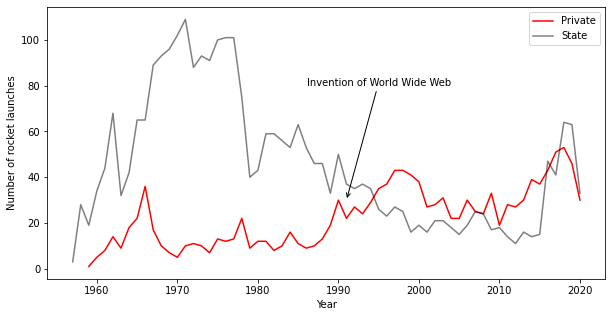

In [321]:
_ = plt.figure(figsize=(10,5))
_ = plt.plot(pd.DataFrame(df[df["Private or State Run"]=="P"].Year).groupby('Year').size(), color='red')
_ = plt.plot(pd.DataFrame(df[df["Private or State Run"]=="S"].Year).groupby('Year').size(), color='black', alpha = 0.5)
_ = plt.legend(['Private', 'State'])
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of rocket launches')
_ = plt.annotate(
# Label and coordinate
'Invention of World Wide Web', xy=(1991, 30),xytext=(1995, 80) ,
horizontalalignment="center",
# Custom arrow
arrowprops=dict(arrowstyle='->',lw=1)
)
_ = plt.show()

Private institutions were present from the earlier days of space missions, but likely in the form of governmental contractors. As can be seen from the above graph, its not until around the mid 1990's that the number of launches from private companies overtook those from governmental institutions. The reasoning for this is likely the rise of the internet (or World Wide Web) in 1990, which increased the world's dependence on and desire for satellite technology. In the following years, other technological advances such as the advent of smartphones would further amplify the latter.

## Which country is leading the private space sector?

In [318]:
countries = df['Companys Country of Origin'].unique()
cwise_comp_count =[]
for i in range(len(countries)):
    cwise_comp_count.append(len(df[df['Companys Country of Origin']==countries[i]]['Company Name'].unique()))

# Remove "Arme de l'Air"
countries = countries[:-1]
cwise_comp_count = cwise_comp_count[:-1]

In [245]:
# Define function for getting latitude and longitude of countries
geolocator = Nominatim(user_agent='vtbaluckram@gmail.com')
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

# Get the latitude and longitude of countries    
countries_lat_lon = []
for country in countries:
    [lat, lon] = geolocate(country)
    countries_lat_lon.append([lat,lon])

# correct for israel
countries_lat_lon[4] = [31.046051,34.851612]

In [246]:
#Setting up the world countries data URL
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [311]:
#create dataframe for company count
df_comp_count = pd.DataFrame(data={'Country':countries, 'Company count':cwise_comp_count})
df_comp_count.replace('USA', "United States of America", inplace = True)
df_comp_count.replace('England', "United Kingdom", inplace = True)

#Adding the Choropleth layer onto our base map
#Creating a base map
world_map = folium.Map(location=[20, 10],zoom_start=2.45)

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='choropleth space companies',
    data=df_comp_count,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['Country', 'Company count'],
    key_on='feature.properties.name',
    fill_color='Accent',
    nan_fill_color='white'
).add_to(world_map)

marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(countries)):
        lat = countries_lat_lon[i][0]
        long = countries_lat_lon[i][1]
        radius=5
        popup_text = """Country : {}<br>
                    Number of Private Companies : {}<br>"""
        popup_text = popup_text.format(countries[i],
                                   cwise_comp_count[i]
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)


world_map

The US is beyond doubt the sole leader in the private space sector with almost **3 times as many active private companies as its next competitor**. 

The above comparison only accounts for companies that have had at least one rocket launch. If other start-ups without rocket launches were accounted for, the disparity would likely be even wider, as the US is currently a very strong incubator for space start-ups.

## Which company is leading private space sector in the US?

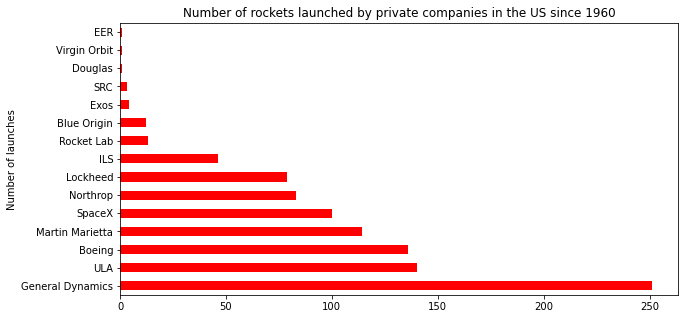

In [248]:
US_private_launches = pd.DataFrame(df[(df["Private or State Run"]=="P") & (df["Companys Country of Origin"]=="USA")]['Company Name'].value_counts())
_ = US_private_launches.plot(kind='barh', color='red', figsize=(10,5), legend=False)
_ = plt.ylabel('Number of launches')
_ = plt.title('Number of rockets launched by private companies in the US since 1960')
_ = plt.show()

Exploring rocket launches from the country with the largest contribution to the private space sector, we can see that companies that we would have expected to have the most launches aren't necessarily leading. But this is probably because of the time wide timeframe that is taken into account in the above plot (1960 - 2020).

A more accurate depiction of today's market leaders is observable if we shorten the timeframe.

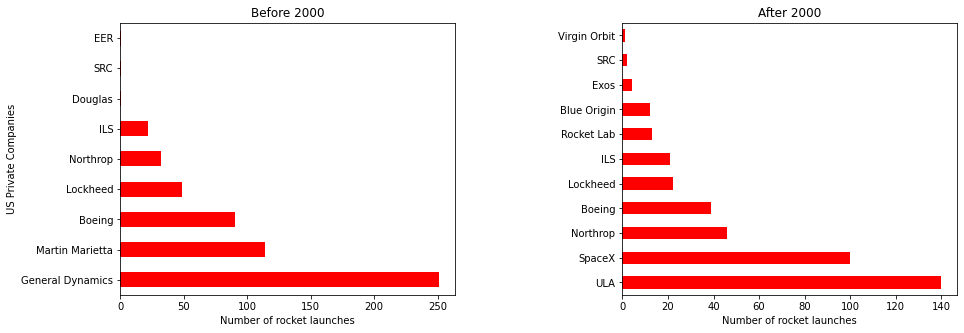

In [282]:
fig, axes = plt.subplots(nrows=1, ncols=2)
US_private_launches = pd.DataFrame(df[(df["Private or State Run"]=="P") & 
                                      (df["Companys Country of Origin"]=="USA") & 
                                      (df["Year"]<2000)]['Company Name'].value_counts())
US_private_launches.plot(kind='barh', color='red', ax=axes[0], legend=False, figsize=(15,5))
US_private_launches = pd.DataFrame(df[(df["Private or State Run"]=="P") & 
                                      (df["Companys Country of Origin"]=="USA") & 
                                      (df["Year"]>2000)]['Company Name'].value_counts())
US_private_launches.plot(kind='barh', color='red', ax=axes[1], legend=False, figsize=(15,5))


#plt.title('Number of rockets launched by private companies in the US since 1960')
plt.subplots_adjust(wspace = 0.5)
axes[0].title.set_text('Before 2000')
axes[0].set_xlabel('Number of rocket launches')
axes[0].set_ylabel('US Private Companies')
axes[1].title.set_text('After 2000')
axes[1].set_xlabel('Number of rocket launches')
plt.show()

As expected, the list of companies involved before 2000 and after 2000 are quite different.

Notably, pre-2000, the companies present in the space sector were mostly defense contractors, such as: Northrop, Lockheed, and General Dynamics.

After 2000, a lot more non-military companies entered the picture, such as: Virgin Orbit, Blue Origin, Rocket Lab and of course the meteoric rise of SpaceX.

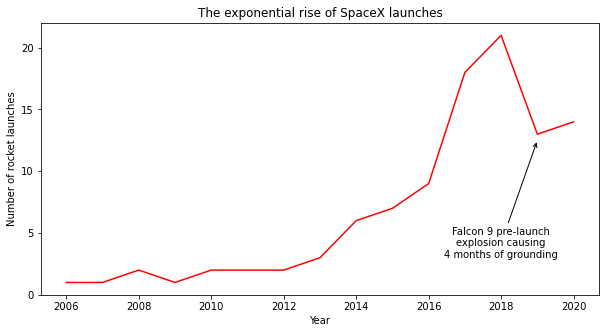

In [322]:
plt.figure(figsize=(10,5))
plt.plot(pd.DataFrame(df[df["Company Name"]=="SpaceX"].Year).groupby('Year').size(), color='red')
plt.annotate(
# Label and coordinate
'Falcon 9 pre-launch\nexplosion causing\n4 months of grounding', xy=(2019, 12.5),xytext=(2018, 3) ,
horizontalalignment="center",
# Custom arrow
arrowprops=dict(arrowstyle='->',lw=1)
)
plt.yticks(np.arange(0, max(cwise_comp_count)+1, 5))
plt.xlabel('Year')
plt.ylabel('Number of rocket launches')
plt.title('The exponential rise of SpaceX launches')
plt.show()

As mentioned above, SpaceX has by far been the most successful space start-up in the past 15 years, creating cutting-edge technology like their autonomous landing rockets which are reusable. Such technology has revolutionized the planning for space exploration and space missions in general. The exponential rise of SpaceX can be observed in the above plot which shows their launches over time. A dip in their growth is seen in 2019 because of a pre-launch explosion which forced the company to ground their rockets and go back to the drawing board. But ultimately, SpaceX came back stronger in 2020 and 2021 becoming the first private company to take astronauts to the International Space Station.